In [1]:
from EntityResolutionEngine import EntityResolutionEngine as EntityResolutionEngine 

import main as sigmod
import similar_feature_grouping as similar_feature_grouping
import helper as helper
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gunesyurdakul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset_path="../datasets/2013_camera_specs/"

dataset_df = sigmod.create_brand_dataframe(dataset_path)
dataset_df = sigmod.compute_brand_blocking(dataset_df)

  0%|          | 0/24 [00:00<?, ?it/s]

>>> Creating dataframe...



100%|██████████| 24/24 [00:12<00:00,  1.99it/s]
384it [00:00, 3833.21it/s]

>>> Dataframe created successfully!

>>> Computing blocking...


29787it [00:05, 5008.71it/s]
29787it [00:05, 5558.65it/s]


ended
>>> Blocking computed successfully!



In [3]:
labelled_df = pd.read_csv('../datasets/sigmod_large_labelled_dataset.csv')
same_products = sigmod.grouping_same_products_from_labelled_set(labelled_df)

#They all represent the same products
len(labelled_df)

297651

In [4]:
data_dict=sigmod.get_all_keys_values(dataset_path)
dataset_df['all_features'] = dataset_df['spec_id'].apply(lambda x: data_dict[x])

100%|██████████| 24/24 [00:14<00:00,  1.90it/s]


In [14]:
dataset_df['page_title'] =  dataset_df['all_features'].apply(lambda x: x['<page title>'])

In [5]:
dataset_df = dataset_df.set_index('spec_id')

In [15]:
dataset_df

,source,spec_number,page_title,brand,blocking_key,all_features
spec_id,,,,,,
www.wexphotographic.com//154,www.wexphotographic.com,154,nikon coolpix aw120 digital camera camouflage ...,,coolpix,"{'requires': 'compatibility information', 'fil..."
www.wexphotographic.com//553,www.wexphotographic.com,553,canon ixus 150 digital camera red (9148b007aa)...,,canon,"{'requires': 'compatibility information', 'fil..."
www.wexphotographic.com//601,www.wexphotographic.com,601,fuji finepix s1 digital camera (p10nc12730a) w...,,fujifilm,"{'requires': 'compatibility information', 'fil..."
www.wexphotographic.com//197,www.wexphotographic.com,197,nikon coolpix s5300 digital camera black (vna5...,,coolpix,"{'requires': 'compatibility information', 'fil..."
www.wexphotographic.com//178,www.wexphotographic.com,178,fuji finepix s8600 digital camera red (p10nc12...,,fujifilm,"{'requires': 'compatibility information', 'fil..."
...,...,...,...,...,...,...
www.canon-europe.com//23,www.canon-europe.com,23,canon powershot a560 powershot ixus digital co...,,powershot,"{'redeye correction': 'yes, playback', 'constr..."
www.canon-europe.com//74,www.canon-europe.com,74,canon ixus 210 powershot ixus digital compact ...,,powershot,"{'redeye correction': 'yes, shooting playback'..."
www.canon-europe.com//62,www.canon-europe.com,62,canon ixus 125 hs powershot ixus digital compa...,,powershot,{'settings': 'auto (including face detection w...


In [16]:
from gensim.models import Word2Vec

In [8]:
#run this only if you don't have the pretrained model 
""" 
all_text=similar_feature_grouping.prepare_text_for_word2vec(data_dict)
emb_dim=200
model = Word2Vec(all_text, size=emb_dim, window=5, min_count=1, workers=4)
model.train(all_text,total_examples=model.corpus_count,epochs=model.epochs)
model.save('word2vec_200_features')
"""

" \nall_text=similar_feature_grouping.prepare_text_for_word2vec(data_dict)\nemb_dim=200\nmodel = Word2Vec(all_text, size=emb_dim, window=5, min_count=1, workers=4)\nmodel.train(all_text,total_examples=model.corpus_count,epochs=model.epochs)\nmodel.save('word2vec_200_features')\n"

In [8]:
model= Word2Vec.load('word2vec_200_features')

****

In [17]:
entity_resolution_engine = EntityResolutionEngine(model,dataset_df,labelled_df)
#entity_resolution_engine.set_model_words_column()

****

# Experimenting on Results for Each Block

In [18]:
blocking_key='canon'

In [21]:
entity_resolution_engine.set_block(blocking_key)
import re

/Users/gunesyurdakul/Desktop/EPFL-Spring2020/Database systems/comp/quickstart_package 2/quickstart_package/EntityResolutionEngine.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.block_df['concat_wordvector']=''


In [22]:
entity_resolution_engine.block_df.page_title


spec_id
www.wexphotographic.com//553       canon ixus 150 digital camera red (9148b007aa)...
www.wexphotographic.com//621       canon ixus 265 hs digital camera pink (9354b00...
www.wexphotographic.com//568       canon ixus 150 digital camera grey (9145b007aa...
www.wexphotographic.com//577       canon ixus 265 hs digital camera purple (9351b...
www.wexphotographic.com//556       canon ixus 265 hs digital camera silver (9348b...
www.wexphotographic.com//599       canon ixus 265 hs digital camera black (9345b0...
www.price-hunt.com//9911           canon ixus 155 point & shoot camera best price...
www.price-hunt.com//840            canon ixus 132 advanced point & shoot camera b...
www.price-hunt.com//9760           canon ixus 125 hs point & shoot camera best pr...
www.price-hunt.com//9824           canon ixus 150 point & shoot camera best price...
www.price-hunt.com//9717           canon digital ixus 510 hs point & shoot camera...
www.price-hunt.com//9825           canon ixus 510 hs poin

In [23]:
pd.set_option('display.max_rows', 1500)
entity_resolution_engine.block_df['model']=entity_resolution_engine.block_df.page_title.apply(lambda x: [' '.join(x[idx:].split()[:4]) for idx in [x.start() for x in re.finditer(blocking_key, x)]])
entity_resolution_engine.block_df['model']=entity_resolution_engine.block_df['model'].apply(lambda x:x[0] if len(x)>0 else '')
entity_resolution_engine.block_df.groupby('model').size()


/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


model
                                                                 44
canon                                                             7
canon 1 dx extremely                                              1
canon 1000d rebel xs                                              1
canon 10d 6 3mp                                                   1
canon 12 1 mp                                                     2
canon 12 megapixel camera                                         1
canon 12mp 5x zoom                                                1
canon 135 16 0                                                    1
canon 135 elph power                                              1
canon 16mp a810 infrared                                          1
canon 18-55mm ne-slr buy                                          3
canon 1d 4 15                                                     1
canon 1d mark ii                                                  4
canon 1d mark iii                         

In [36]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
len(entity_resolution_engine.block_df)

2437

### DIMENSIONALITY REDUCTION AND CLUSTERING

In [37]:
labels,T = entity_resolution_engine.run_TSNE()
entity_resolution_engine.run_DBSCAN(eps_=2, min_samples_=2)

/Users/gunesyurdakul/Desktop/EPFL-Spring2020/Database systems/comp/quickstart_package 2/quickstart_package/EntityResolutionEngine.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.block_df['inblock_cluster'] = self.assigned_clusters


****

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
plt.scatter(T[:,0], T[:,1], c=entity_resolution_engine.assigned_clusters, cmap='hsv')

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

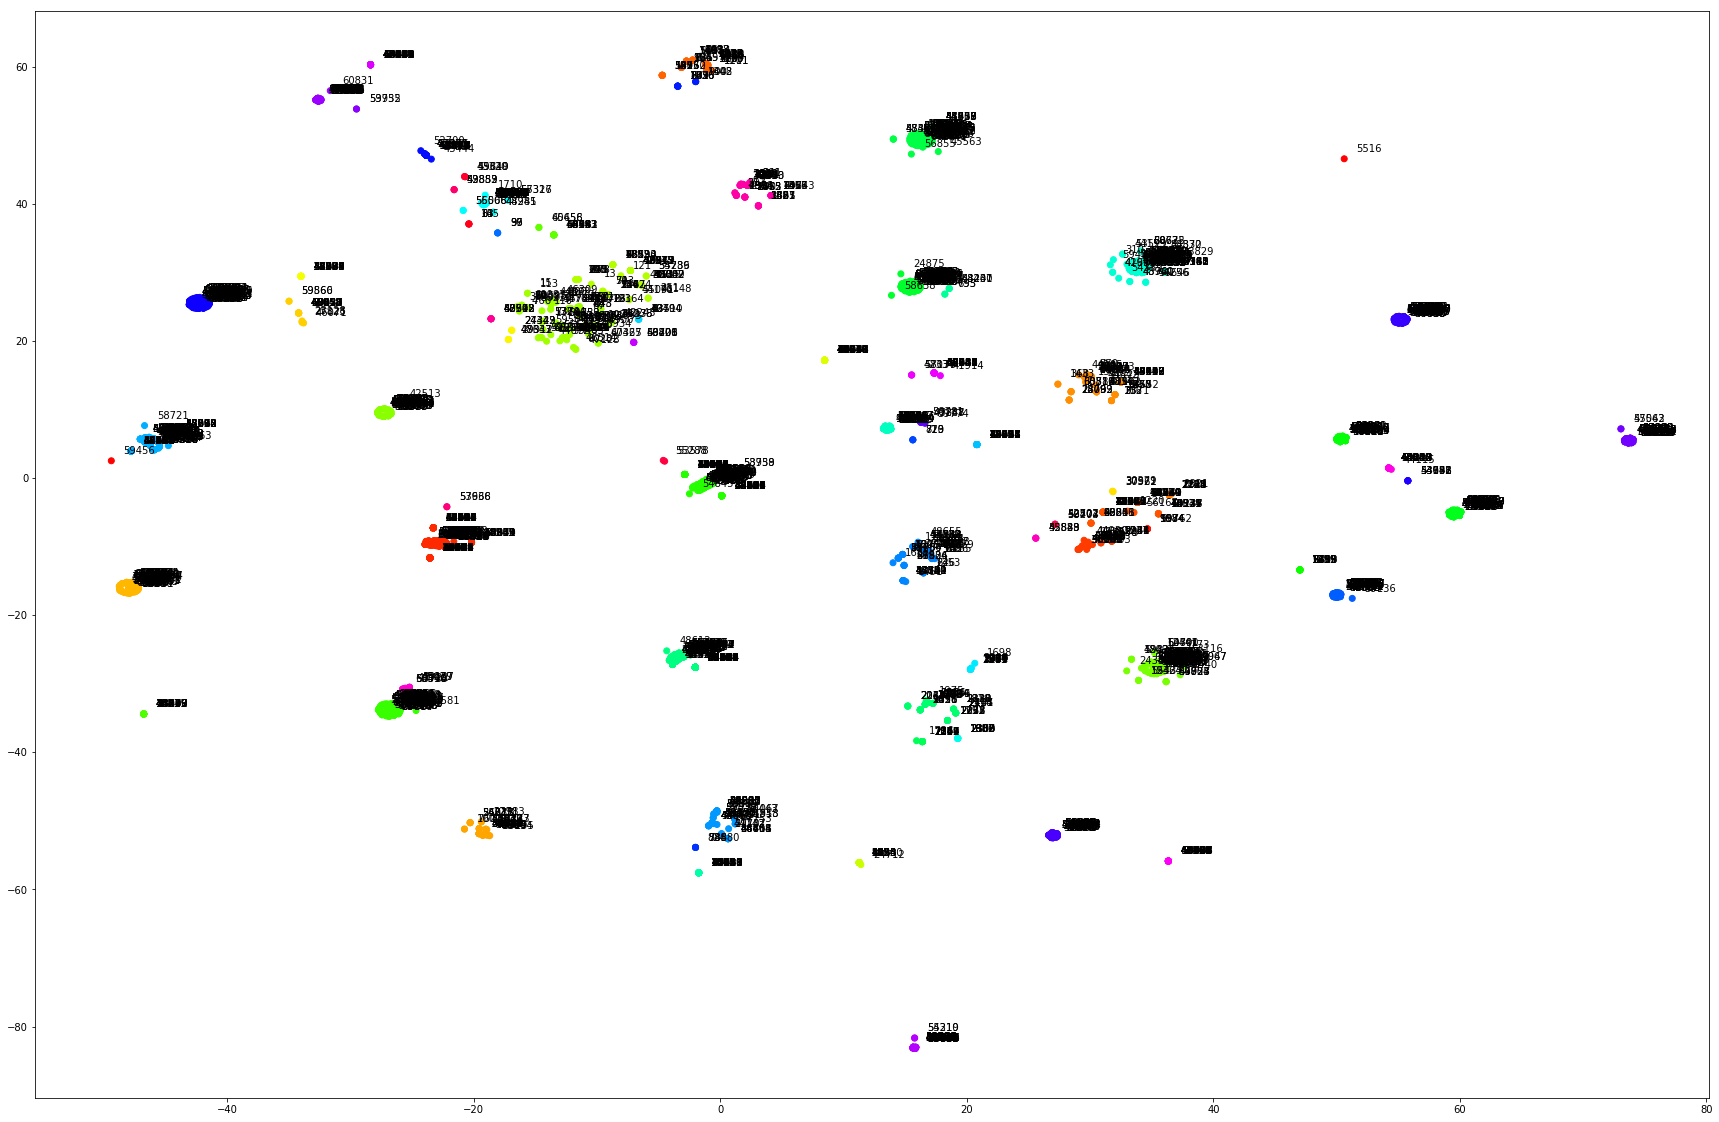

In [39]:
plt.show()

In [30]:
entity_resolution_engine.get_pairs(threshold=0.6)

KeyboardInterrupt: 

In [40]:
for cluster in entity_resolution_engine.product_clusters:
    for spec_id in cluster:
        print(dataset_df.loc[spec_id][['page_title']].values)
    print('-------------------')

[['rain cover for canon eos digital slr & nikon d series camera pentax ++ - buy rain cover,camera rain cover,rain cover for camera product on alibaba.com']
 ['rain cover for canon eos digital slr & nikon d series camera pentax ++ - buy rain cover,camera rain cover,rain cover for camera product on alibaba.com']]
['canon eos digital xt silver ef s 18 55 kit camera dslr gently used | ebay']
-------------------
['canon eos 550d dslr camera best price in india 2014, specs and review | valid in delhi, mumbai, bangalore, hyderabad, chennai, kolkata, ahmedabad, surat | price-hunt']
['canon eos 550d dslr kit ef-s18-55mm is black price in india with offers, reviews & full specifications | pricedekho.com']
['canon eos 550d dslr kit ef-s18-135mm is ii black price in india with offers, reviews & full specifications | pricedekho.com']
['canon eos 550d dslr body black price in india with offers, reviews & full specifications | pricedekho.com']
[['canon camera eos 550d bag 3 cd | ebay']
 ['canon camer

['new canon eos 1dx dslr camera body 17 40mm 70 200mm lens 16gb professional kit 013803145410 | ebay']
['canon eos 60da dslr astrophotography camera 013803151701 | ebay']
['canon eos 30d dslr 715nm standard ir infrared converted camera | ebay']
-------------------
['canon eos 60d dslr camera best price in india 2014, specs and review | valid in delhi, mumbai, bangalore, hyderabad, chennai, kolkata, ahmedabad, surat | price-hunt']
['canon eos 70d dslr camera best price in india 2014, specs and review | valid in delhi, mumbai, bangalore, hyderabad, chennai, kolkata, ahmedabad, surat | price-hunt']
['canon eos 60d dslr camera rs.48500 price in india - buy canon eos 60d dslr camera black online - canon : flipkart.com']
['buy canon eos 70d dslr camera with 18-135mm lens cameras - digital - slr 8469b016 today at pc connection']
['buy canon eos 70d dslr camera (body only) cameras - digital - slr 8469b002 today at pc connection']
['buy canon eos 70d dslr camera with 18-55mm lens cameras - digi

['canon eos 60d 18 0 mp digital slr camera black body only 013803129052 | ebay']
['canon eos 60d 18 0 mp digital slr camera black body only 013803129052 | ebay']
['canon eos 60d 18 0 mp digital slr camera black body only 013803129052 | ebay']
['canon eos 60d 18 0 mp dslr black body only used great condition 2 batteries 013803129052 | ebay']
['canon eos 60d 18 0 mp digital slr camera black body only 013803129052 | ebay']
['canon eos 60d 18 0 mp dslr camera kit w ef s is 18 135mm lens w extras 013803129113 | ebay']
['canon eos 60d 18 0 mp digital slr camera black kit w ef s is 18 55mm lens | ebay']
['canon eos 60d 18 0 mp digital slr w 35 80mm lens 013803129052 | ebay']
['canon eos 60d 18 0 mp digital slr camera kit w ef s is 18 135mm many extras 013803129113 | ebay']
['canon eos 60d 18 0 mp digital slr camera black body only 013803129052 | ebay']
['canon eos 60d 18 mp cmos digital slr camera bundle with lens flash 013803129052 | ebay']
['canon eos 60d 18 mp digital slr camera black kit 

['canon camera eos 400d digital ds126151 | ebay']
['canon eos 20d digital slr camera body only | ebay']
['canon eos 10d digital dslr body strap software battery charger 6 3mp | ebay']
['canon eos d30 digital slr camera body 3 2 mp w battery grip bg ed3 cf card 082966162046 | ebay']
['canon eos 1dx digital slr camera canon ef 200 400mm f 4l is usm w 1 4x 013803145410 | ebay']
['canon eos 1dx digital slr camera 5253b002 1d x body only new 013803145410 | ebay']
['canon eos 50d digital slr body only in good condition eos 50d 013803129052 | ebay']
['canon eos 1dx digital slr camera 5253b002 1d x body only bnib 013803145410 | ebay']
['canon eos 20d digital slr camera w bg e2n battery grip | ebay']
['canon eos 40d digital slr camera black body only | ebay']
['canon eos d30 digital slr 3 2 mp w canon 35 80mm 1 4 5 5 6 lens 082966162046 | ebay']
['canon eos 30d digital slr camera body only | ebay']
['8 mp converted to infrared canon eos 350d digital slr camera 720nm ir filter | ebay']
['canon e

In [41]:
entity_resolution_engine.output_df

,left_spec_id,right_spec_id,left_page_title,right_page_title


----------------------

In [19]:
labelled_df = pd.read_csv('../datasets/sigmod_large_labelled_dataset.csv')

labelled_index = list(set(list(labelled_df.left_spec_id.values)+list(labelled_df.right_spec_id.values)))

labelled_data_df = dataset_df.loc[labelled_index]

In [20]:
entity_resolution_engine = EntityResolutionEngine(model,labelled_data_df,labelled_df)

In [ ]:
for blocking_key in set(entity_resolution_engine.dataset_df['blocking_key']):
    print(blocking_key)
    entity_resolution_engine.set_model_words_column()
    entity_resolution_engine.set_block(blocking_key)
    if len(entity_resolution_engine.block_df)==1 or blocking_key =='other':
        continue
    labels,T = entity_resolution_engine.run_TSNE()
    entity_resolution_engine.run_DBSCAN(eps_=8, min_samples_=2)
    entity_resolution_engine.get_pairs(threshold=0.2)